In [6]:
!pip install scikit-learn
!pip install umap-learn
!pip install seaborn

In [7]:
#Import numpy
import numpy as np

#Import scikitlearn for machine learning functionalities
import sklearn
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.datasets import load_digits # For the UCI ML handwritten digits dataset

# Import matplotlib for plotting graphs ans seaborn for attractive graphics.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
%matplotlib inline

import seaborn as sb

## Линейные методы - пытаются сохранить исходный вектор в проекции на другое пространство
## Нейлинейные методы - пытаются сохранить исходное расстояние в проекции на другое пространство

(1797, 64)


<Figure size 640x480 with 0 Axes>

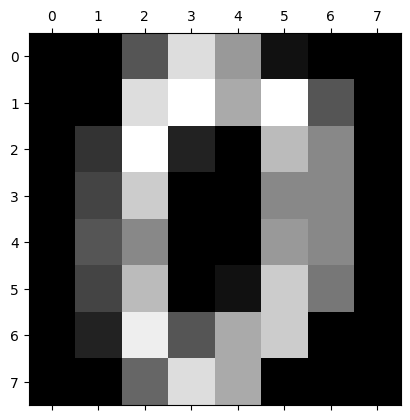

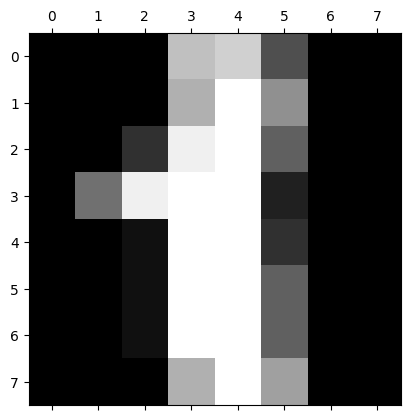

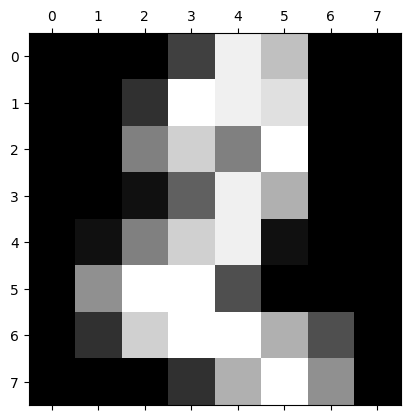

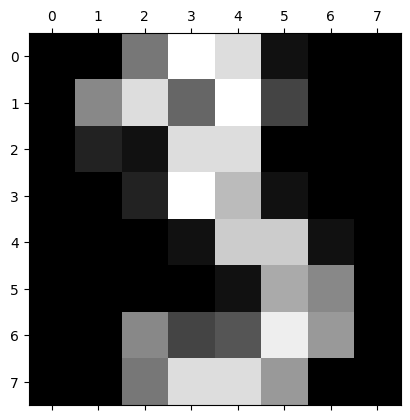

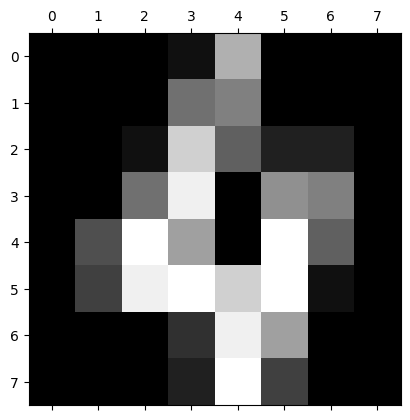

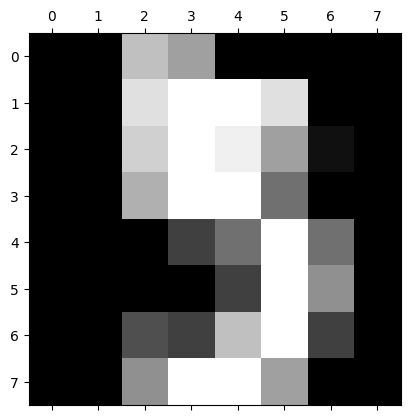

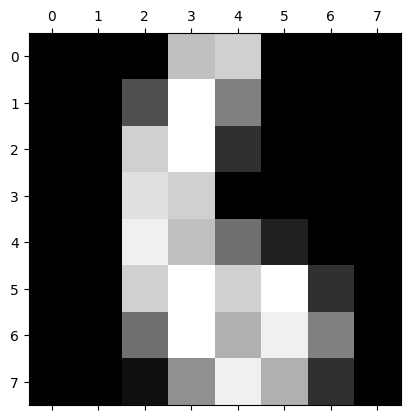

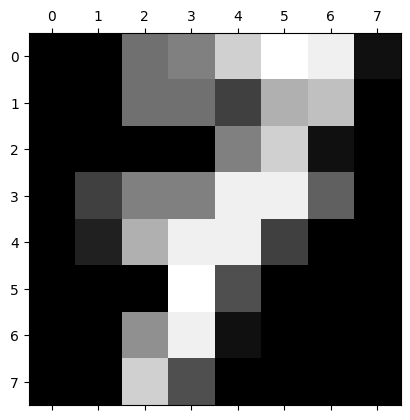

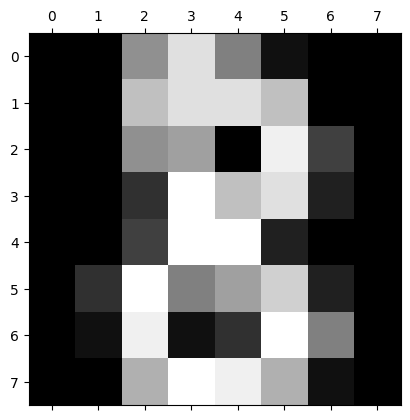

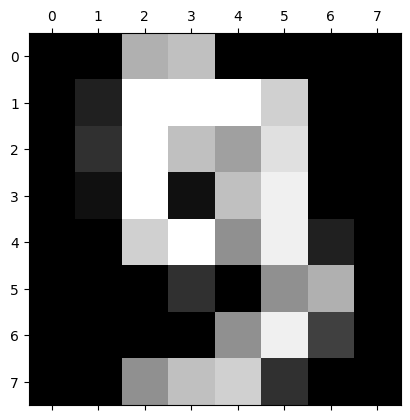

In [8]:
digits = load_digits()
print(digits.data.shape) # There are 10 classes (0 to 9) with alomst 180 images in each class 
                         # The images are 8x8 and hence 64 pixels(dimensions)
plt.gray();
#Displaying what the standard images look like
for i in range(0,10):
    plt.matshow(digits.images[i]) 
    plt.show()

In [9]:
digits['data'][-1].shape

(64,)

In [10]:
X = np.vstack([digits.data[digits.target==i] for i in range(10)]) # Place the arrays of data of each digit on top of each other and store in X
Y = np.hstack([digits.target[digits.target==i] for i in range(10)]) # Place the arrays of data of each target digit by the side of each other continuosly and store in Y

In [11]:
X[-1]

array([ 0.,  0.,  2., 10.,  7.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       15.,  1.,  0.,  0.,  4., 16.,  7.,  3., 16.,  7.,  0.,  0.,  5.,
       16., 10.,  7., 16.,  4.,  0.,  0.,  0.,  5., 14., 14., 16.,  4.,
        0.,  0.,  0.,  0.,  0.,  0., 16.,  2.,  0.,  0.,  0.,  4.,  7.,
        7., 16.,  2.,  0.,  0.,  0.,  5., 12., 16., 12.,  0.,  0.])

In [12]:
#Implementing the TSNE Function - ah Scikit learn makes it so easy!
digits_final = TSNE(perplexity=30).fit_transform(X) 
#Play around with varying the parameters like perplexity, random_state to get different plots

In [13]:
#With the above line, our job is done. But why did we even reduce the dimensions in the first place?
#To visualise it on a graph.

#So, here is a utility function that helps to do a scatter plot of thee transformed data 

def plot(x, colors):
  
    palette = np.array(sb.color_palette("hls", 10))  #Choosing color palette 

    # Create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(int)])
    # Add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([pe.Stroke(linewidth=5, foreground="w"), pe.Normal()])
        txts.append(txt)
    return f, ax, txts


(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(1.1713287830352783, 55.629119873046875, '0'),
  Text(5.330668926239014, -12.574525833129883, '1'),
  Text(-28.570764541625977, -30.7056827545166, '2'),
  Text(-37.90201950073242, 2.1120188236236572, '3'),
  Text(43.51960754394531, -12.964363098144531, '4'),
  Text(1.8166818618774414, 19.267749786376953, '5'),
  Text(32.88933563232422, 22.28575897216797, '6'),
  Text(8.363694190979004, -42.59409713745117, '7'),
  Text(-11.548347473144531, -5.83914852142334, '8'),
  Text(-22.61004638671875, 17.94902229309082, '9')])

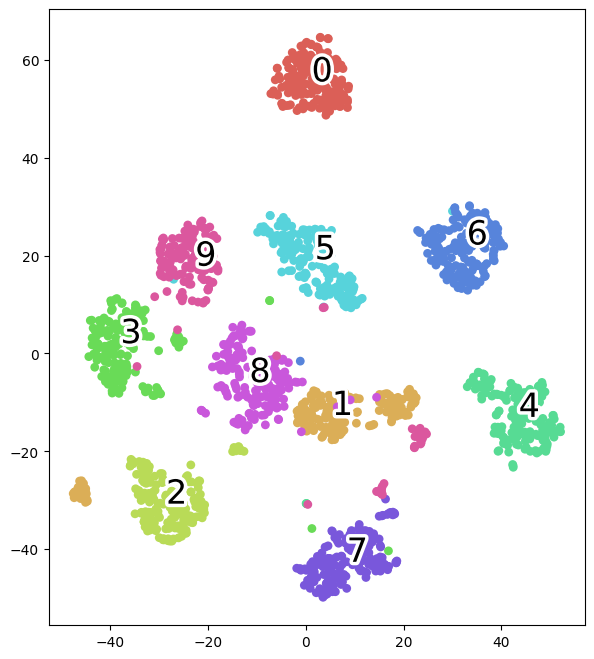

In [14]:
plot(digits_final,Y)

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(1.8985427834877138, 21.3977914135303, '0'),
  Text(6.198511421767862, -13.622367044913087, '1'),
  Text(-10.633241720532732, -6.866312687568087, '2'),
  Text(-19.649397783398985, 1.6352713573314486, '3'),
  Text(23.395297869300386, -0.5207492650497715, '4'),
  Text(-3.1862171736998213, 0.3590111998454119, '5'),
  Text(16.517511451118807, 12.41671091830584, '6'),
  Text(-0.036641455086235515, -16.785952190383323, '7'),
  Text(-0.7915809823541249, -4.996062583437002, '8'),
  Text(-14.592922826463035, 10.640960411691918, '9')])

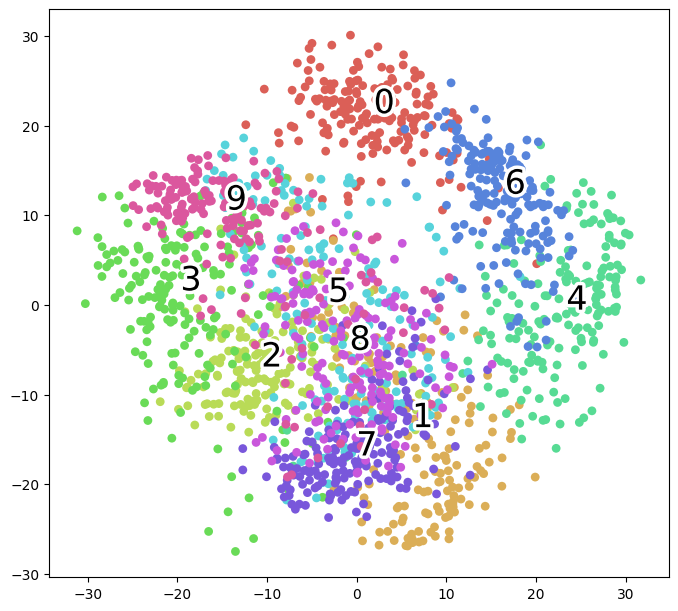

In [15]:
digits_final = PCA(n_components=2).fit_transform(X)

plot(digits_final,Y)

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(1.6197309494018555, 54.12566375732422, '0'),
  Text(5.195269584655762, -12.155891418457031, '1'),
  Text(-27.533905029296875, -29.49847984313965, '2'),
  Text(-37.463985443115234, 2.118211030960083, '3'),
  Text(42.696449279785156, -12.949893951416016, '4'),
  Text(1.7913544178009033, 19.135967254638672, '5'),
  Text(33.692169189453125, 21.710092544555664, '6'),
  Text(8.40042495727539, -42.58583450317383, '7'),
  Text(-11.347776412963867, -5.297033786773682, '8'),
  Text(-22.543598175048828, 17.77553367614746, '9')])

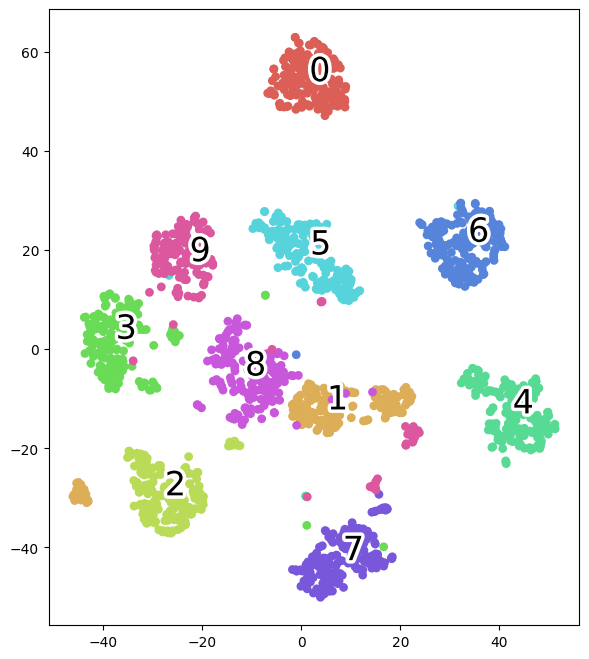

In [16]:
digits_final = TSNE(perplexity=30).fit_transform(X)

plot(digits_final,Y)

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(18.985523223876953, 10.55828857421875, '0'),
  Text(-5.577683448791504, 8.499134063720703, '1'),
  Text(9.633198738098145, 3.3761208057403564, '2'),
  Text(2.099339008331299, 9.69590950012207, '3'),
  Text(6.0210137367248535, 19.36089515686035, '4'),
  Text(-1.400989055633545, 2.638402223587036, '5'),
  Text(0.033504389226436615, -7.041789531707764, '6'),
  Text(-1.1220372915267944, 16.679075241088867, '7'),
  Text(-3.4918713569641113, 8.590476036071777, '8'),
  Text(1.403735637664795, 5.646489143371582, '9')])

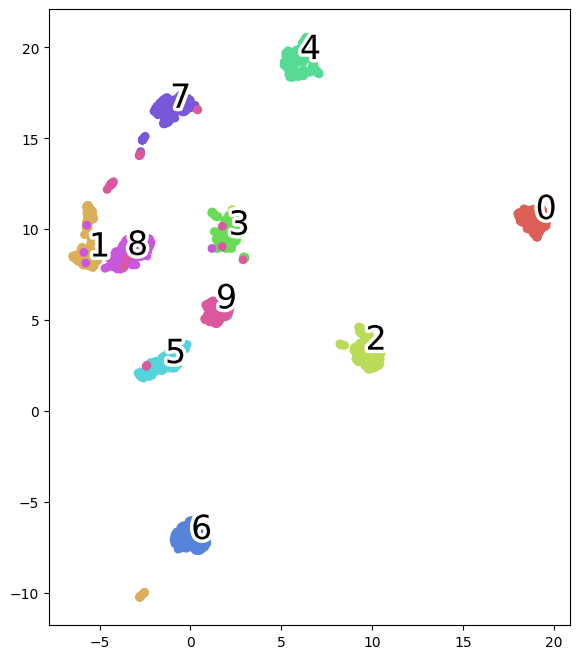

In [17]:
digits_final = UMAP(n_components=2).fit_transform(X)

plot(digits_final,Y)